## 실습 평가 과제



#### 과제 1.
아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

Q2. df를 수정하여 3가지 이상의 인사이트를 포함한 데이터셋으로 변환 후 데이터셋을 data_gen.csv 파일 로 저장하세요.




#### 과제2
data_gen.csv 파일을 불러와서 데이터셋에 대한 통계적 탐색을 수행하고 아래 예시를 참조하여 분석용 데이터셋으로서 가치를 제고하기 위한 수정작업을 하신 후 데이터셋이 포함하고 있는 특징 및 인사이트를 정리하여 기술하고 그 결과 파일을 data_rev.csv 이름으로 저장하세요.

(예시) 분석용 데이터셋 가치를 제고하기 위하여 통계적 분석 기법을 이용하여 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정하세요.
- 가격, 구매 수량에 10개의 결측치 반영
- 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
- 성별에 따른 구매 구액의 분포에 이상치가 포함되지 않도록 수정

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
data1='/content/drive/MyDrive/KDT_240424/m3_분석라이브러리/평가/data_gen.csv'
data_gen=pd.read_csv(data1)

In [99]:
data_gen.head()

,custid,gender,age,region,tran_num,date,year,month,day,time,product,price,quantity,amount
0,994,1,24,9,4521,2020-02-28,2020,2,금,8.0,20.0,22354.0,6.0,134124.0
1,994,1,24,9,2514,2020-08-04,2020,8,화,5.0,10.0,42203.0,52.0,2194556.0
2,994,1,24,9,8803,2020-05-13,2020,5,수,22.0,10.0,48803.0,4.0,195212.0
3,994,1,24,9,4320,2020-08-09,2020,8,일,12.0,30.0,15685.0,58.0,909730.0
4,994,1,24,9,1772,2021-07-12,2021,7,월,3.0,20.0,37952.0,42.0,1593984.0


In [100]:
# 과제2 정리를 위해 df_rev2로 카피하여 진행
df_rev2=data_gen.copy()

In [101]:
# 데이터 수정 :
date_sample2=pd.date_range('2021-01-01','2021-12-31',freq='D')
date_sample3=pd.date_range('2020-01-01','2020-12-31',freq='D')

In [102]:
df_rev2['date']=pd.to_datetime(df_rev2['date'])

In [103]:
# A-1) custid>=800은 2020년도 거래 데이터 삭제 (custidid>=800은 2021년 신규 고객)
#    *** if custid>=800 & date<'2021-01-01', change date to above '2021-01-01'
condition=(df_rev2['custid']>=800) & (df_rev2['date']<='2020-12-31')

np.random.seed(0)
df_rev2.loc[condition, 'date']=np.random.choice(date_sample2,size=condition.sum())

# A-2) custid<=130은 2021년도 거래 데이터를 2020으로 바꾸기
condition2=(df_rev2['custid']<=130) & (df_rev2['date']>='2021-01-01')

np.random.seed(1)
df_rev2.loc[condition2, 'date']=np.random.choice(date_sample3, size=condition2.sum())

In [104]:
df_rev2.head()

,custid,gender,age,region,tran_num,date,year,month,day,time,product,price,quantity,amount
0,994,1,24,9,4521,2021-06-22,2020,2,금,8.0,20.0,22354.0,6.0,134124.0
1,994,1,24,9,2514,2021-02-17,2020,8,화,5.0,10.0,42203.0,52.0,2194556.0
2,994,1,24,9,8803,2021-04-28,2020,5,수,22.0,10.0,48803.0,4.0,195212.0
3,994,1,24,9,4320,2021-07-12,2020,8,일,12.0,30.0,15685.0,58.0,909730.0
4,994,1,24,9,1772,2021-07-12,2021,7,월,3.0,20.0,37952.0,42.0,1593984.0


In [105]:
# 서로 영향 주는 변수들 재정리 필요:
# date = year, month, day
# amount= price, quantity
df_rev2['year']=df_rev2['date'].dt.year
df_rev2['month']=df_rev2['date'].dt.month
df_rev2['day']=df_rev2['date'].dt.dayofweek

df_rev2['amount']=df_rev2['price']*df_rev2['quantity']

# day의 요일 숫자 => 영문으로 수정
day={0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df_rev2['day']=df_rev2['day'].apply(lambda x:day[x])
df_rev2.head()

,custid,gender,age,region,tran_num,date,year,month,day,time,product,price,quantity,amount
0,994,1,24,9,4521,2021-06-22,2021,6,Tues,8.0,20.0,22354.0,6.0,134124.0
1,994,1,24,9,2514,2021-02-17,2021,2,Wed,5.0,10.0,42203.0,52.0,2194556.0
2,994,1,24,9,8803,2021-04-28,2021,4,Wed,22.0,10.0,48803.0,4.0,195212.0
3,994,1,24,9,4320,2021-07-12,2021,7,Mon,12.0,30.0,15685.0,58.0,909730.0
4,994,1,24,9,1772,2021-07-12,2021,7,Mon,3.0,20.0,37952.0,42.0,1593984.0


In [106]:
bins=[0,19,29,39,49,59,69,100]
labels=['below 20s','20s','30s','40s','50s','60s','70 or above']
df_rev2['age_group']=pd.cut(df_rev2['age'], bins=bins, labels=labels)

In [107]:
gender_pivot=df_rev2.pivot_table(index='age_group', columns=['year','gender'],values='custid', aggfunc=pd.Series.nunique)
print(gender_pivot)

year        2020     2021    
gender         0   1    0   1
age_group                    
below 20s     44  30   45  44
20s           66  61   71  67
30s           57  61   60  63
40s           60  56   73  59
50s           53  71   61  76
60s           49  67   50  66
70 or above   61  61   62  71


In [108]:
# B-1) custid>=800은 age<=40 & gender=female 이 과반수 이상이도록 수정 (신규 고객은 젊은 여성을 과반으로)

# 1). custid>=800, age>=60 & gender= female ==> age 25~40, gender=female로 수정
condition3=(df_rev2['custid']>=800) & (df_rev2['age']>=60) & (df_rev2['gender']==1)
df_rev2.loc[condition3,'age']=np.random.randint(25,40,size=condition3.sum())

# 2. custid>=800 이며 40대 이후의 남성은 gender를 여성으로, age=25-52 사이로
condition4=(df_rev2['custid']>=800) & (df_rev2['age']>=40) & (df_rev2['gender']==0)
df_rev2.loc[condition4,'gender']=1
df_rev2.loc[condition4,'age']=np.random.randint(25,53,size=condition4.sum())

# 3. gender=0 & age>=73 ==> gender=1 & age=33~56세 사이로
condition5=(df_rev2['age']>=73) & (df_rev2['gender']==0)
df_rev2.loc[condition5,'gender']=1
df_rev2.loc[condition5,'age']=np.random.randint(33,56,size=condition5.sum())

# 4. 75세 이상 여성을 30대로 옮기기
condition6=(df_rev2['age']>=75) & (df_rev2['gender']==1)
df_rev2.loc[condition6,'age']=np.random.randint(27,35,size=condition6.sum())

In [109]:
bins=[0,19,29,39,49,59,69,100]
labels=['below 20s','20s','30s','40s','50s','60s','70 or above']
df_rev2['age_group']=pd.cut(df_rev2['age'], bins=bins, labels=labels)

In [110]:
gender_pivot=df_rev2.pivot_table(index='age_group', columns=['year','gender'],values='custid', aggfunc=pd.Series.nunique)
print(gender_pivot)

year        2020      2021     
gender         0    1    0    1
age_group                      
below 20s     44   30   45   44
20s           66   92   71  174
30s           57  133   60  207
40s           60   94   54  150
50s           53  106   43  148
60s           49   67   42   52
70 or above   15   26   10   23


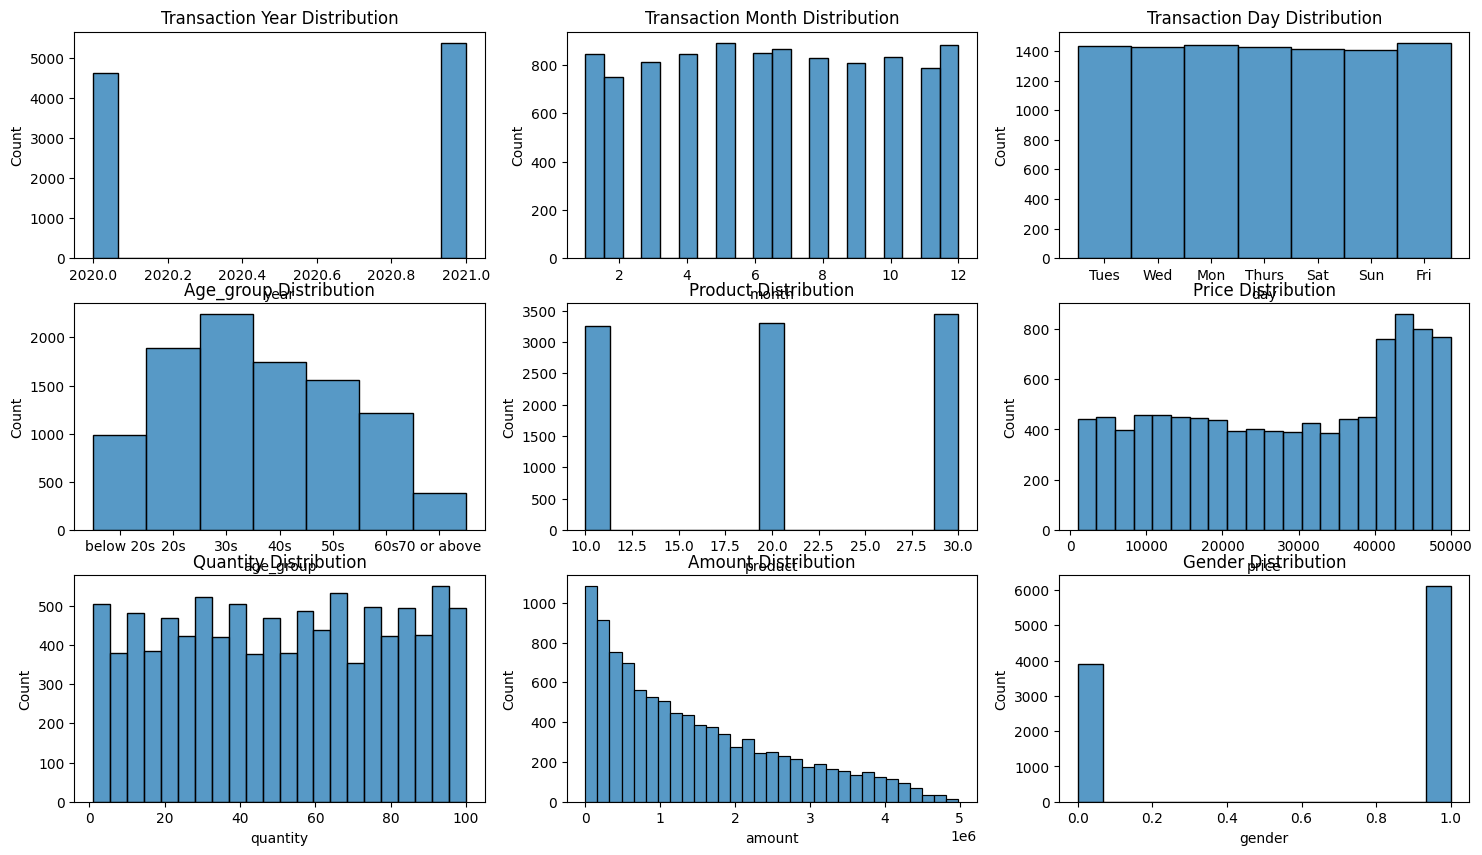

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# 확인해볼 데이터:
# (1) 2020, 2021 빈도
# (2) age_group
# (3) product 타입별 빈도
# (4) price
# (5) quantity
# (6) amount

fig, axes=plt.subplots(3,3, figsize=(18,10))

sns.histplot(df_rev2['year'], ax=axes[0,0])
axes[0,0].set_title('Transaction Year Distribution')

sns.histplot(df_rev2['month'], ax=axes[0,1])
axes[0,1].set_title('Transaction Month Distribution')

sns.histplot(df_rev2['day'], ax=axes[0,2])
axes[0,2].set_title('Transaction Day Distribution')

sns.histplot(df_rev2['age_group'], ax=axes[1,0])
axes[1,0].set_title('Age_group Distribution')

sns.histplot(df_rev2['product'], ax=axes[1,1])
axes[1,1].set_title('Product Distribution')

sns.histplot(df_rev2['price'], ax=axes[1,2])
axes[1,2].set_title('Price Distribution')

sns.histplot(df_rev2['quantity'], ax=axes[2,0])
axes[2,0].set_title('Quantity Distribution')

sns.histplot(df_rev2['amount'], ax=axes[2,1])
axes[2,1].set_title('Amount Distribution')

sns.histplot(df_rev2['gender'], ax=axes[2,2])
axes[2,2].set_title('Gender Distribution')

plt.show()

In [112]:
# 2-3-4. 거래데이터 수정 전에 copy
df_rev3=df_rev2.copy()

In [113]:
# 거래 달 피벗 생성 (수정 전 현황)
month_pivot=pd.pivot_table(df_rev3,index='year',columns='month', values='custid',aggfunc=pd.Series.nunique)
print(month_pivot)

month   1    2    3    4    5    6    7    8    9    10   11   12
year                                                             
2020   313  297  269  306  311  324  292  311  280  305  284  321
2021   347  314  367  359  368  324  359  327  345  345  329  363


In [114]:
# 2-3-4. << 거래 데이터 수정할 내용 >>
# A-1) 거래 달이 12~2월인 경우 4~8월로 수정 (4~8월의 거래가 많도록 수정)

# 1. 2020년 거래, 고가에 45000원 이상이며 10월 이상의 달 혹은 1~2월에 거래한 경우 ==> 6~7월로 month 옮기기:
con1=(df_rev3['date'].dt.year==2020) & (df_rev3['product']==10) & (df_rev3['price']>=45000) & ((df_rev3['date'].dt.month>=10)|(df_rev3['date'].dt.month<=2))
df_rev3.loc[con1,'date']=np.random.choice((pd.date_range('2020-06-01','2020-07-31', freq='D')), con1.sum())

# 2. 2021년 거래, 고가에 45000원 이상이며 10월 이상의 달 혹은 1~2월에 거래한 경우 ==> 6~7월로 month 옮기기:
con2=(df_rev3['date'].dt.year==2021) & (df_rev3['product']==10) & (df_rev3['price']>=45000) & ((df_rev3['date'].dt.month>=10)|(df_rev3['date'].dt.month<=2))
df_rev3.loc[con2,'date']=np.random.choice((pd.date_range('2021-06-01','2021-07-31', freq='D')), con2.sum())

# 3. 2020년 중간 product에 35000원 이상이며 12월, 1월, 2월에 거래한 경우 ==> 4~8월로 month 옮기기:
con3=(df_rev3['date'].dt.year==2020) & (df_rev3['product']==20) & (df_rev3['price']>=35000) & ((df_rev2['date'].dt.month==12)|(df_rev2['date'].dt.month<=2))
df_rev3.loc[con3,'date']=np.random.choice((pd.date_range('2020-04-10','2020-08-31', freq='D')), con3.sum())

# 4. 2021년 중간 product에 35000원 이상이며 12월, 1월, 2월에 거래한 경우 ==> 4~8월로 month 옮기기:
con4=(df_rev3['date'].dt.year==2021) & (df_rev3['product']==20) & (df_rev3['price']>=35000) & ((df_rev2['date'].dt.month==12)|(df_rev2['date'].dt.month<=2))
df_rev3.loc[con4,'date']=np.random.choice((pd.date_range('2020-04-10','2020-08-31', freq='D')), con4.sum())

# 5. 2020년. 저가 product 인데 15000원 이상이고 11,12월에 거래한 경우 ==> 3~5월로 month 옮기기:
con5=(df_rev3['date'].dt.year==2020) & (df_rev3['product']==30) & (df_rev3['price']>=15000) & ((df_rev2['date'].dt.month>=11))
df_rev3.loc[con5,'date']=np.random.choice((pd.date_range('2020-03-01','2020-05-31', freq='D')), con5.sum())

# 6. 2021년. 저가 product 인데 15000원 이상이고 11,12월에 거래한 경우 ==> 3~5월로 month 옮기기:
con6=(df_rev3['date'].dt.year==2021) & (df_rev3['product']==30) & (df_rev3['price']>=15000) & ((df_rev2['date'].dt.month>=11))
df_rev3.loc[con6,'date']=np.random.choice((pd.date_range('2021-03-01','2021-05-31', freq='D')), con6.sum())


In [115]:
df_rev3['year']=df_rev3['date'].dt.year
df_rev3['month']=df_rev3['date'].dt.month
df_rev3['day']=df_rev3['date'].dt.dayofweek
day={0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df_rev3['day']=df_rev3['day'].apply(lambda x:day[x])

In [116]:
# 거래 달 피벗 생성 (수정 후 현황)
month_pivot2=pd.pivot_table(df_rev3,index='year',columns='month', values='custid',aggfunc=pd.Series.nunique)
print(month_pivot2)

month   1    2    3    4    5    6    7    8    9    10   11   12
year                                                             
2020   255  241  278  340  351  443  393  346  280  260  224  230
2021   281  241  378  373  386  420  444  327  345  306  253  277


In [117]:
# B-1) quantity>=20 인 경우 10 이하로 수량 랜덤 배분
# B-2) quantity 분포 확인해서 분포가 5~6에 가깝도록 맞추기
con_quantity=(df_rev3['quantity']>=20)
df_rev3.loc[con_quantity,'quantity']=np.random.randint(1,10, size=con_quantity.sum())

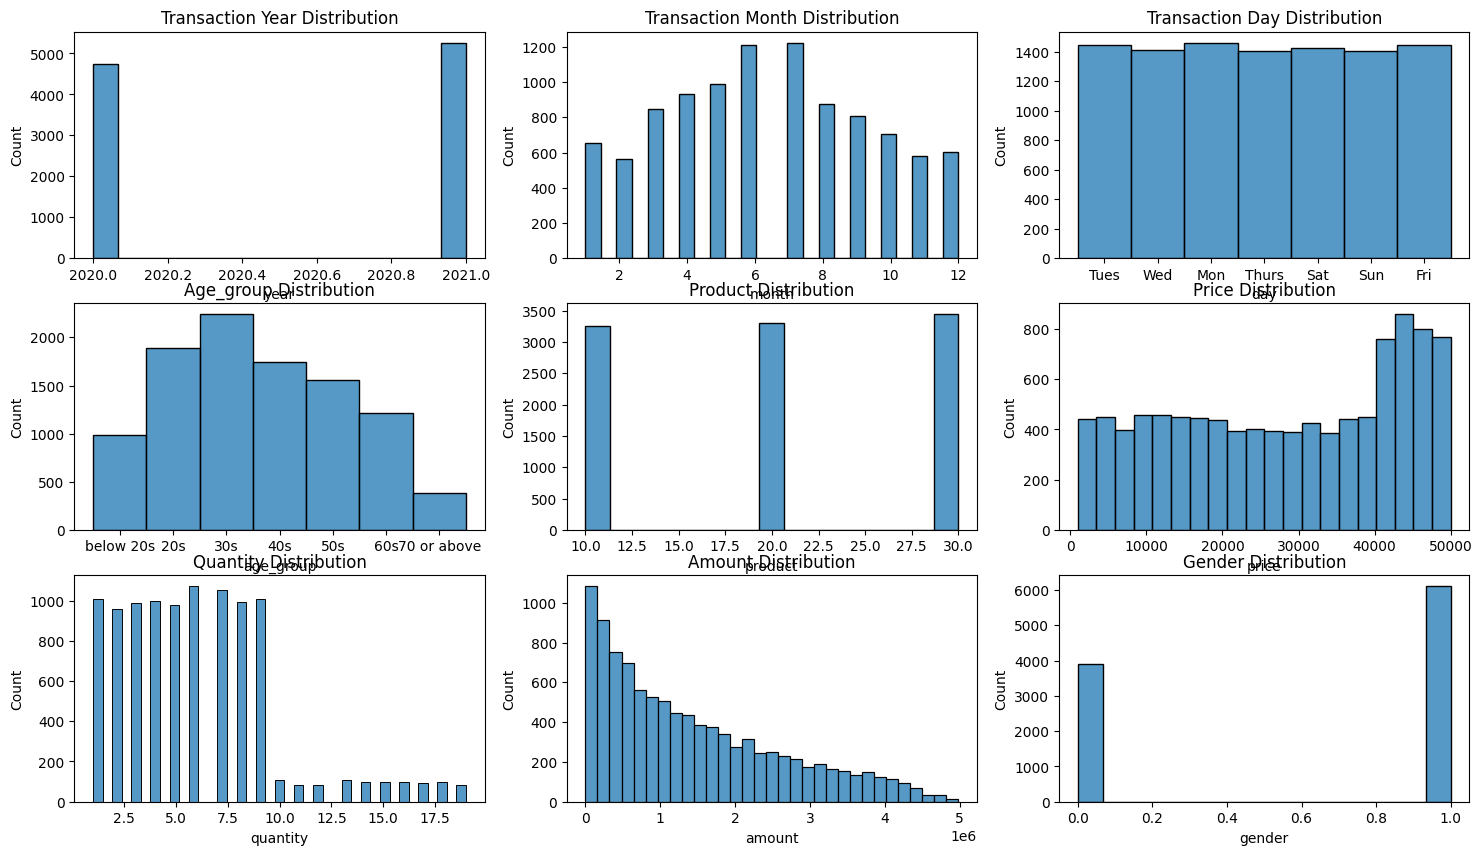

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# 확인해볼 데이터:
# (1) 2020, 2021 빈도
# (2) age_group
# (3) product 타입별 빈도
# (4) price
# (5) quantity
# (6) amount

fig, axes=plt.subplots(3,3, figsize=(18,10))

sns.histplot(df_rev3['year'], ax=axes[0,0])
axes[0,0].set_title('Transaction Year Distribution')

sns.histplot(df_rev3['month'], ax=axes[0,1])
axes[0,1].set_title('Transaction Month Distribution')

sns.histplot(df_rev3['day'], ax=axes[0,2])
axes[0,2].set_title('Transaction Day Distribution')

sns.histplot(df_rev3['age_group'], ax=axes[1,0])
axes[1,0].set_title('Age_group Distribution')

sns.histplot(df_rev3['product'], ax=axes[1,1])
axes[1,1].set_title('Product Distribution')

sns.histplot(df_rev3['price'], ax=axes[1,2])
axes[1,2].set_title('Price Distribution')

sns.histplot(df_rev3['quantity'], ax=axes[2,0])
axes[2,0].set_title('Quantity Distribution')

sns.histplot(df_rev3['amount'], ax=axes[2,1])
axes[2,1].set_title('Amount Distribution')

sns.histplot(df_rev3['gender'], ax=axes[2,2])
axes[2,2].set_title('Gender Distribution')

plt.show()

In [119]:
# 과제 2 인사이트 요약 :

# 1. 2020년 대비 2021년의 거래가 증가
# 2. 5~7월 사이에 거래가 가장 많음. 따뜻한 시기에 구매 욕구가 높은 것으로 보임
# 3. 2030 세대에게 가장 인기가 좋음
# 4. 남성보다는 여성의 구매가 많음

#### 과제3.
Q1. data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.

Q2. data_analysis.csv를 기반으로 아래 예시를 참조하여 새로운 분석 과제를 정의한 후 그 과제에 적합한 분석용 데이터셋을 만든 후 과제에 적합한 이유 및 특징을 기술하고 data_obj.csv로 저장하세요.

(예시)고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행.(거래기준 데이터 -> 고객기준 데이터로 변환)

## << Q1 >>
###### data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.

In [120]:
data2='/content/drive/MyDrive/KDT_240424/m3_분석라이브러리/평가/data_rev.csv'
data_rev=pd.read_csv(data2)

In [121]:
data_rev.head()

,custid,gender,age,age_group,region,tran_num,date,year,month,day,time,product,price,quantity,amount
0,994,1,24,20s,9,4521,2021-06-22,2021,6,Tues,8.0,20.0,22354.0,6.0,134124.0
1,994,1,24,20s,9,2514,2021-02-17,2021,2,Wed,5.0,10.0,42203.0,5.0,2194556.0
2,994,1,24,20s,9,8803,2021-04-28,2021,4,Wed,22.0,10.0,48803.0,4.0,195212.0
3,994,1,24,20s,9,4320,2021-07-12,2021,7,Mon,12.0,30.0,15685.0,7.0,909730.0
4,994,1,24,20s,9,1772,2021-07-12,2021,7,Mon,3.0,20.0,37952.0,7.0,1593984.0


In [122]:
df1=data_rev.copy()

In [123]:
df1['amount']=df1['price']*df1['quantity']

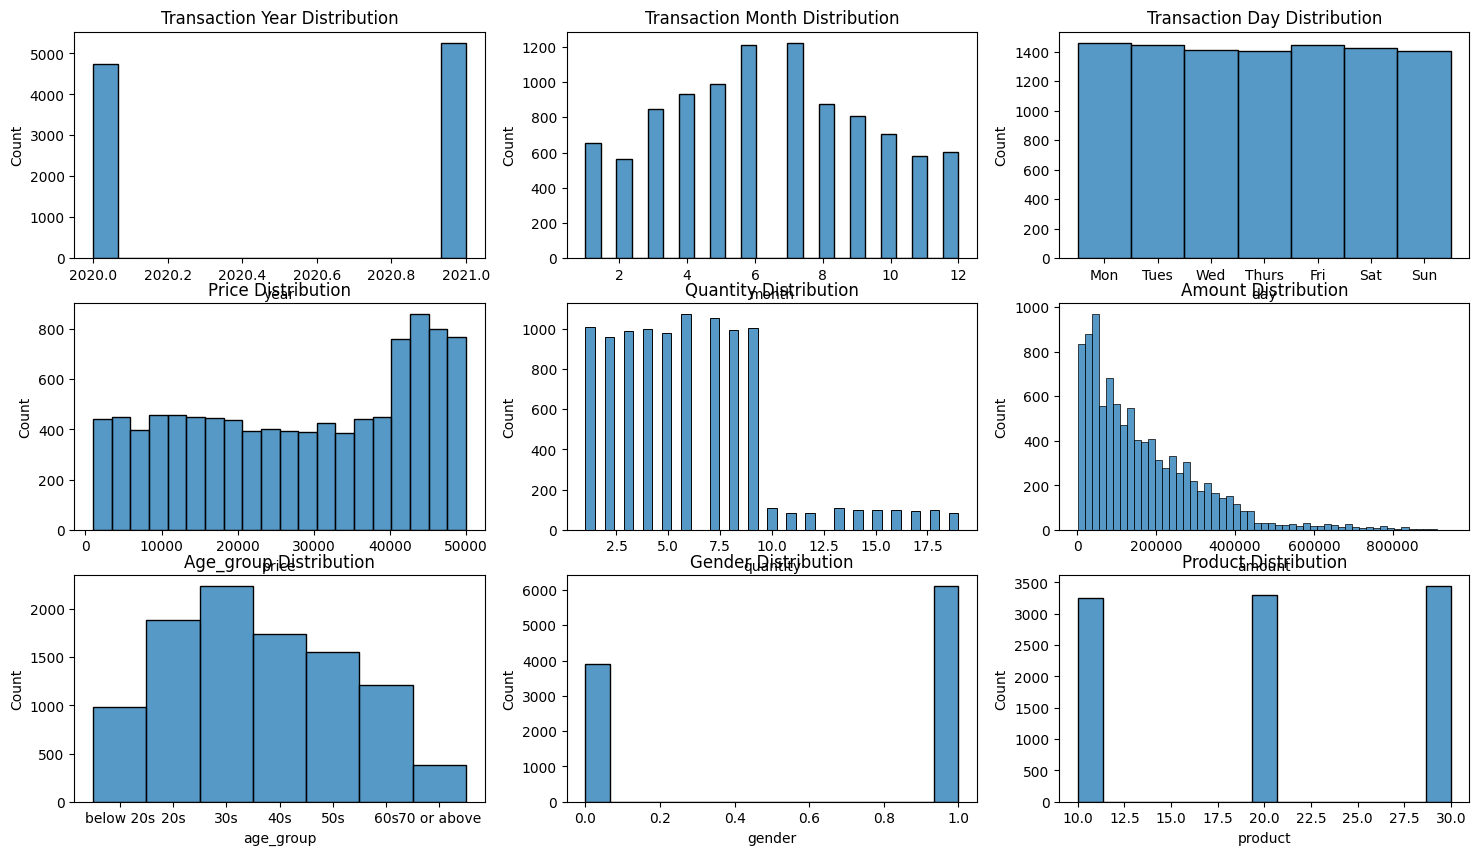

In [124]:
age_order = pd.CategoricalDtype(categories=['below 20s', '20s', '30s', '40s', '50s', '60s', '70 or above'], ordered=True)
df1['age_group'] = df1['age_group'].astype(age_order)

day_order = pd.CategoricalDtype(categories=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], ordered=True)
df1['day'] = df1['day'].astype(day_order)


fig, axes=plt.subplots(3,3, figsize=(18,10))

sns.histplot(df1['year'], ax=axes[0,0])
axes[0,0].set_title('Transaction Year Distribution')

sns.histplot(df1['month'], ax=axes[0,1])
axes[0,1].set_title('Transaction Month Distribution')

sns.histplot(df1['day'], ax=axes[0,2])
axes[0,2].set_title('Transaction Day Distribution')

sns.histplot(df1['price'], ax=axes[1,0])
axes[1,0].set_title('Price Distribution')

sns.histplot(df1['quantity'], ax=axes[1,1])
axes[1,1].set_title('Quantity Distribution')

sns.histplot(df1['amount'], ax=axes[1,2])
axes[1,2].set_title('Amount Distribution')

sns.histplot(df1['age_group'], ax=axes[2,0])
axes[2,0].set_title('Age_group Distribution')

sns.histplot(df1['gender'], ax=axes[2,1])
axes[2,1].set_title('Gender Distribution')

sns.histplot(df1['product'], ax=axes[2,2])
axes[2,2].set_title('Product Distribution')

plt.show()

In [125]:
df1.head()

,custid,gender,age,age_group,region,tran_num,date,year,month,day,time,product,price,quantity,amount
0,994,1,24,20s,9,4521,2021-06-22,2021,6,Tues,8.0,20.0,22354.0,6.0,134124.0
1,994,1,24,20s,9,2514,2021-02-17,2021,2,Wed,5.0,10.0,42203.0,5.0,211015.0
2,994,1,24,20s,9,8803,2021-04-28,2021,4,Wed,22.0,10.0,48803.0,4.0,195212.0
3,994,1,24,20s,9,4320,2021-07-12,2021,7,Mon,12.0,30.0,15685.0,7.0,109795.0
4,994,1,24,20s,9,1772,2021-07-12,2021,7,Mon,3.0,20.0,37952.0,7.0,265664.0


In [126]:
# 분석을 위해 일부 열 int 코드로 변환
age_group_n={'below 20s':0,'20s':1,'30s':2,'40s':3,'50s':4,'60s':5,'70 or above':6}
day_n={'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}

df1['age_group_n']=df1['age_group'].map(age_group_n)
df1['day_n']=df1['day'].map(day_n)

In [127]:
df1.head()

,custid,gender,age,age_group,region,tran_num,date,year,month,day,time,product,price,quantity,amount,age_group_n,day_n
0,994,1,24,20s,9,4521,2021-06-22,2021,6,Tues,8.0,20.0,22354.0,6.0,134124.0,1,1
1,994,1,24,20s,9,2514,2021-02-17,2021,2,Wed,5.0,10.0,42203.0,5.0,211015.0,1,2
2,994,1,24,20s,9,8803,2021-04-28,2021,4,Wed,22.0,10.0,48803.0,4.0,195212.0,1,2
3,994,1,24,20s,9,4320,2021-07-12,2021,7,Mon,12.0,30.0,15685.0,7.0,109795.0,1,0
4,994,1,24,20s,9,1772,2021-07-12,2021,7,Mon,3.0,20.0,37952.0,7.0,265664.0,1,0


In [128]:
# 분석을 위한 데이터 셋
columns=['custid','gender','age_group_n','region','year','month','day_n','time','product','price','quantity','amount']
df3=df1[columns]

In [129]:
df3.head()

,custid,gender,age_group_n,region,year,month,day_n,time,product,price,quantity,amount
0,994,1,1,9,2021,6,1,8.0,20.0,22354.0,6.0,134124.0
1,994,1,1,9,2021,2,2,5.0,10.0,42203.0,5.0,211015.0
2,994,1,1,9,2021,4,2,22.0,10.0,48803.0,4.0,195212.0
3,994,1,1,9,2021,7,0,12.0,30.0,15685.0,7.0,109795.0
4,994,1,1,9,2021,7,0,3.0,20.0,37952.0,7.0,265664.0


             custid  gender  age_group_n  region  year  month  day_n  time  \
custid         1.00    0.16        -0.13   -0.01  0.47   0.00   0.00 -0.01   
gender         0.16    1.00         0.05    0.02  0.10  -0.01   0.00  0.00   
age_group_n   -0.13    0.05         1.00    0.08 -0.11  -0.00  -0.01  0.01   
region        -0.01    0.02         0.08    1.00 -0.02  -0.00   0.01  0.02   
year           0.47    0.10        -0.11   -0.02  1.00   0.00   0.00 -0.01   
month          0.00   -0.01        -0.00   -0.00  0.00   1.00  -0.01  0.00   
day_n          0.00    0.00        -0.01    0.01  0.00  -0.01   1.00 -0.00   
time          -0.01    0.00         0.01    0.02 -0.01   0.00  -0.00  1.00   
product       -0.00    0.00        -0.01   -0.01 -0.01  -0.03  -0.01  0.00   
price         -0.00   -0.01         0.01    0.01 -0.01   0.02   0.01  0.00   
quantity       0.00   -0.00         0.01   -0.01 -0.01   0.02  -0.00 -0.01   
amount         0.00   -0.01         0.01   -0.00 -0.01   0.02   

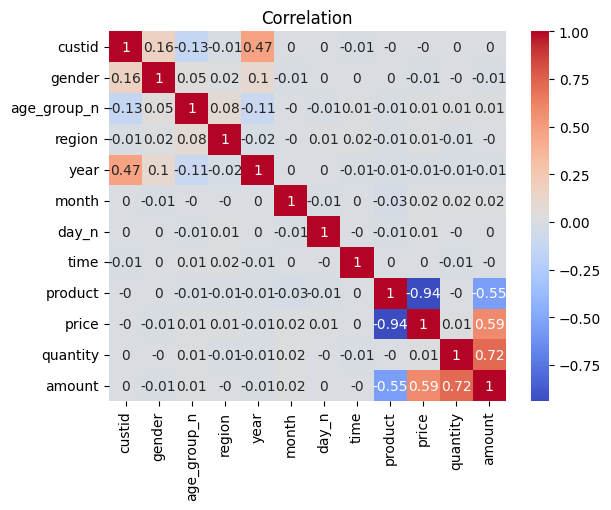

In [130]:
# 상관관계 확인
df3_corr=df3.corr().round(2)
print(df3_corr)

# 상관관계 히트맵으로 확인
sns.heatmap(df3_corr, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [131]:
# 1-1. 2020, 2021년 고객 수 비교
customers_by_year=df1.pivot_table(columns='year', index='gender', values='custid', aggfunc=pd.Series.nunique)
customers_by_year2=df1.pivot_table(columns='year', index='gender', values='custid', aggfunc=pd.Series.nunique, margins=True, margins_name='Total')

customers_by_year2

year,2020,2021,Total
gender,,,
0,353,325,381
1,478,542,619
Total,831,867,1000


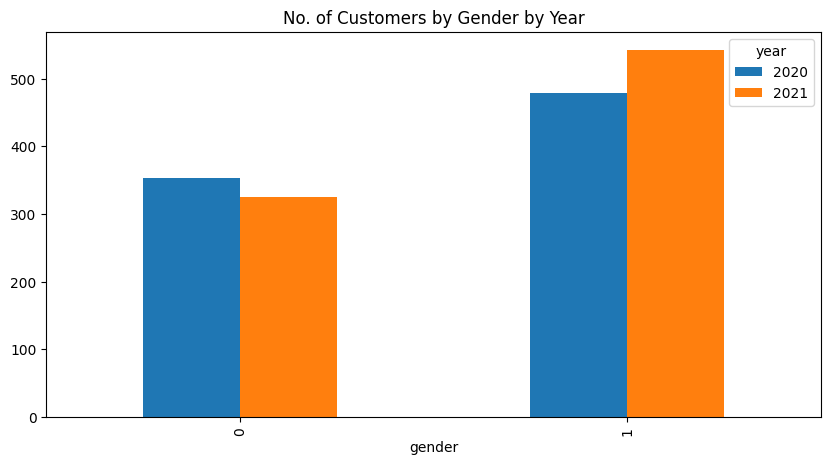

In [132]:
# 1-2. 시각화
customers_by_year.plot(kind='bar', figsize=(10,5))
plt.title('No. of Customers by Gender by Year')
plt.show()

In [133]:
# 2-1. 성별 X Age (고객군 별 고객수 증감 확인)
age_gender_pivot=df1.pivot_table(columns=['gender','age_group'], index='year', values='custid', aggfunc=pd.Series.nunique)
age_gender_pivot

gender            0                                         1                 \
age_group below 20s 20s 30s 40s 50s 60s 70 or above below 20s  20s  30s  40s   
year                                                                           
2020             46  70  60  60  53  49          15        31   99  142   98   
2021             45  71  60  54  43  42          10        44  173  207  150   

gender                          
age_group  50s 60s 70 or above  
year                            
2020       113  67          26  
2021       146  52          23

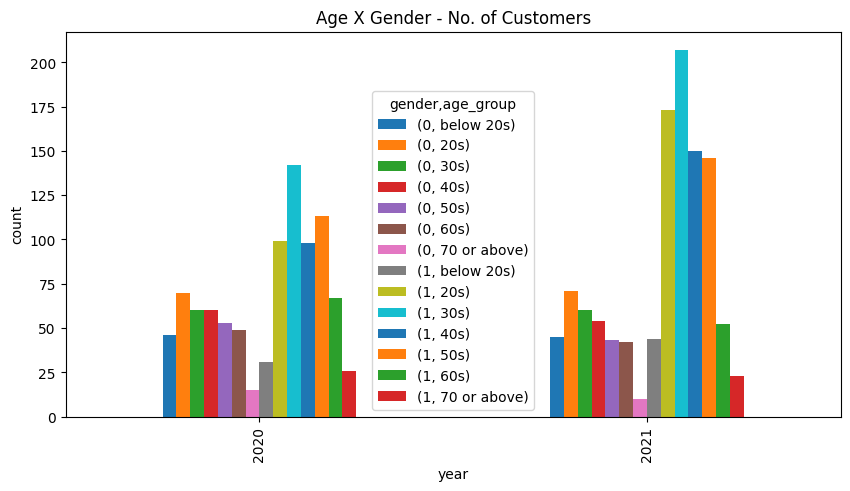

In [134]:
# 2-1. 시각화
age_gender_pivot.plot(kind='bar', figsize=(10,5), width=0.5)
plt.xlabel('year')
plt.ylabel('count')
plt.title('Age X Gender - No. of Customers')
plt.show()

In [135]:
# 2-2. 성별 X Age (고객군 별 거래 증감 확인)
age_gender_pivot2=df1.pivot_table(columns=['gender','age_group'], index='year', values='tran_num', aggfunc=pd.Series.nunique)
age_gender_pivot2

gender            0                                              1            \
age_group below 20s  20s  30s  40s  50s  60s 70 or above below 20s  20s  30s   
year                                                                           
2020            268  377  363  352  332  292         103       162  432  577   
2021            251  424  377  279  202  236          33       300  652  923   

gender                                
age_group  40s  50s  60s 70 or above  
year                                  
2020       449  487  406         132  
2021       662  538  278         113

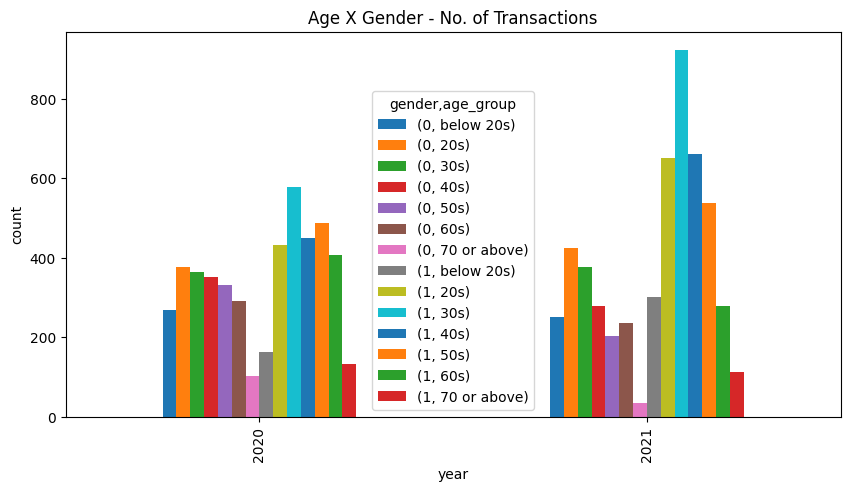

In [136]:
# 2-2. 시각화
age_gender_pivot2.plot(kind='bar', figsize=(10,5))
plt.xlabel('year')
plt.ylabel('count')
plt.title('Age X Gender - No. of Transactions')
plt.show()

In [137]:
# 인사이트 1 (고객 유형 변화):
# 2020년 대비 2021년에 전반적으로 여성 고객 수가 늘어났음.
    # 특히, 20-40 고객이 크게 증가한 반면
    # 60대 이상의 여성에서는 이탈이 보여짐
# 남성은 2020, 2021년의 구매가 비슷하게 유지되고 있으나 60대 이상에서 2021년 구매 하락이 나타남


In [138]:
# 인사이트 2 (고객 거래 변화):
# 여성 고객의 증가에 힘 입어 2021년의 여성 고객 구매량이 대폭 증가
# 이는 특히 20-40 여성에서 크게 나타남
# 반면, 60대 이상의 여성은 고객수의 하락과 함께 거래량 또한 줄어듦

# 남성 고객은 2020년 대비 2021년에 40대 이상에서 거래량 하락이 나타남
# 다만, 20대 남성에게서는 오히려 21년도 구매율이 높아짐

# 따라서, 2030층에는 성별 무관하게 잘 먹힘

In [139]:
# 3-1. 2020, 2021의 Month 거래 확인
month_pivot=df1.pivot_table(columns='month', index='year', values='tran_num', aggfunc=pd.Series.nunique)
month_pivot2

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,255,241,278,340,351,443,393,346,280,260,224,230
2021,281,241,378,373,386,420,444,327,345,306,253,277


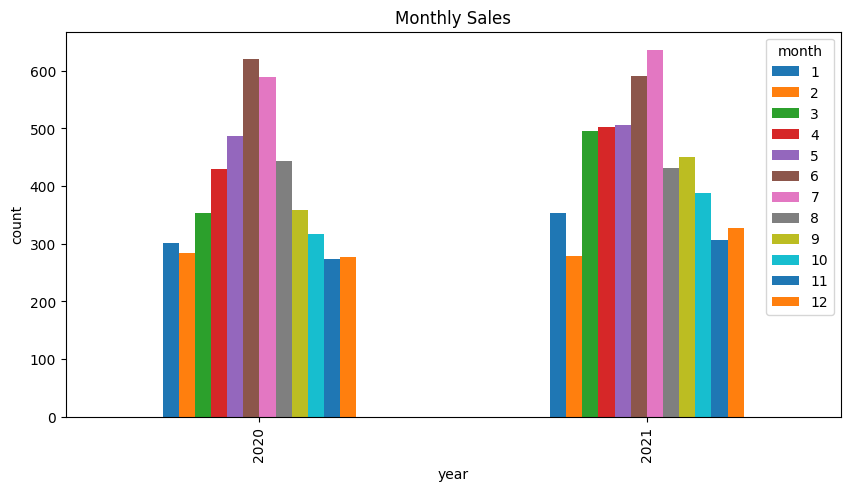

In [140]:
# 3-1. 시각화
month_pivot.plot(kind='bar', figsize=(10,5))
plt.xlabel('year')
plt.ylabel('count')
plt.title('Monthly Sales')
plt.show()

In [141]:
# 4-1. 2020, 2021년 구매 비교
transaction_by_year=df1.groupby('year')['tran_num'].count()

print(transaction_by_year,'\n')
print(f"구매량 비교 (2021-2020): {transaction_by_year.iloc[1]-transaction_by_year.iloc[0]}")

year
2020    4732
2021    5268
Name: tran_num, dtype: int64 

구매량 비교 (2021-2020): 536


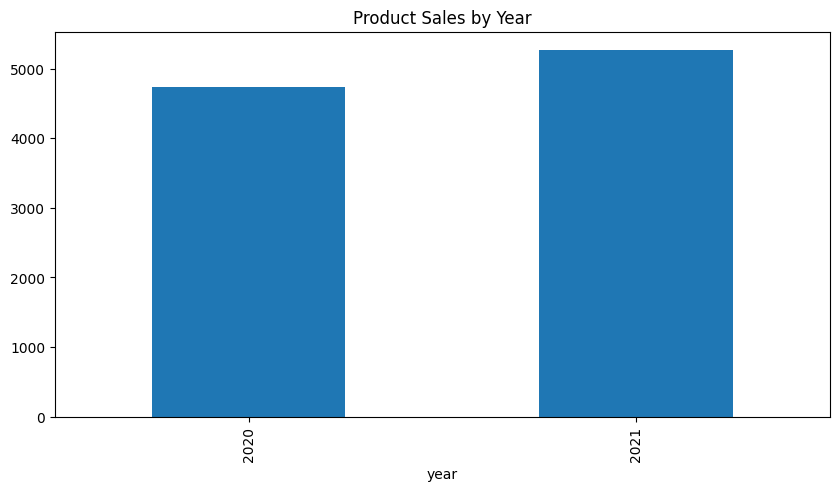

In [142]:
# 4-2. 시각화
transaction_by_year.plot(kind='bar', figsize=(10,5))
plt.title('Product Sales by Year')
plt.show()

In [143]:
# 인사이트 3 (거래량 변화와 구매량 높은 시기)
# 2020 대비 2021년 구매량 소폭 증가함
# 2020, 2021년 모두 5~7월 사이가 구매량이 가장 높은 것으로 나타남
    # 2021년은 3,4월의 거래가 전년 대비 눈에 띄게 상승
# 봄/여름에 인기 많음

In [144]:
# 5-1. product sales
product_pivot=df1.pivot_table(index='year',columns='product', values='tran_num', aggfunc=pd.Series.nunique, margins=True, margins_name='Total').round(2)
product_pivot

product,10.0,20.0,30.0,Total
year,,,,
2020,1480,1650,1602,4732
2021,1779,1649,1840,5268
Total,3259,3299,3442,10000


In [145]:
# 5-2. product X price (2)
avg_price_by_year=df1.groupby(['year','product'])['price'].mean().round(1)
avg_price_by_year

year  product
2020  10.0       45023.3
      20.0       30806.6
      30.0       10548.3
2021  10.0       44909.1
      20.0       29441.1
      30.0       10591.1
Name: price, dtype: float64

In [146]:
# price 데이터 수정 필요
# 2021년에 저가는 1.05, 중간은 1.07, 고가는 1.06 씩 금액 올리기

In [147]:
df4=df1.copy()

In [148]:
con1=(df4['year']==2021) & (df4['product']==10) # 2021년 고가 제품
con2=(df4['year']==2021) & (df4['product']==20) # 2021년 중가 제품
con3=(df4['year']==2021) & (df4['product']==30) # 2021년 저가 제품

df4.loc[con1,'price']=df4['price']*(1.05)
df4.loc[con2,'price']=df4['price']*(1.07)
df4.loc[con3,'price']=df4['price']*(1.06)

In [149]:
avg_price_by_year2=df4.groupby(['product','year'])['price'].mean().round(1)
avg_price_by_year2

product  year
10.0     2020    45023.3
         2021    47154.6
20.0     2020    30806.6
         2021    31502.0
30.0     2020    10548.3
         2021    11226.6
Name: price, dtype: float64

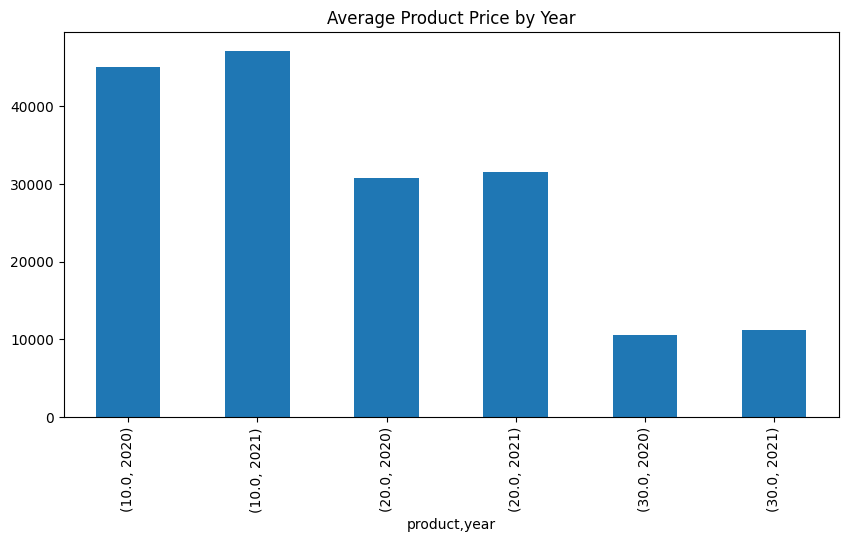

In [150]:
# 5-3. 5-2의 시각화
avg_price_by_year2.plot(kind='bar', figsize=(10,5))
plt.title('Average Product Price by Year')
plt.show()

In [151]:
# 인사이트 4 (제품별 구매량 변화)
# 2020년 대비 2021년에 저가와 고가의 제품의 구매량이 증가함
# 2021년 대비 2021년에 전 제품의 가격이 약 6% 정도 상승

In [152]:
df4.head()

,custid,gender,age,age_group,region,tran_num,date,year,month,day,time,product,price,quantity,amount,age_group_n,day_n
0,994,1,24,20s,9,4521,2021-06-22,2021,6,Tues,8.0,20.0,23918.78,6.0,134124.0,1,1
1,994,1,24,20s,9,2514,2021-02-17,2021,2,Wed,5.0,10.0,44313.15,5.0,211015.0,1,2
2,994,1,24,20s,9,8803,2021-04-28,2021,4,Wed,22.0,10.0,51243.15,4.0,195212.0,1,2
3,994,1,24,20s,9,4320,2021-07-12,2021,7,Mon,12.0,30.0,16626.10,7.0,109795.0,1,0
4,994,1,24,20s,9,1772,2021-07-12,2021,7,Mon,3.0,20.0,40608.64,7.0,265664.0,1,0


In [153]:
df4.to_csv("/content/drive/MyDrive/KDT_240424/m3_분석라이브러리/평가/시험/data_analysis.csv", index=False)

### << 과제 3 - Q1 인사이트 요약 >>

인사이트 1 (고객 유형 변화):
* 2020년 대비 2021년에 전반적으로 여성 고객 수가 늘어났음.
    - 특히, 20-40 고객이 크게 증가한 반면
    - 60대 이상의 여성에서는 이탈이 보여짐
* 남성은 2020, 2021년의 구매가 비슷하게 유지되고 있으나 60대 이상에서 2021년 구매 하락이 나타남


인사이트 2 (고객 거래 변화):
* 여성 고객의 증가에 힘 입어 2021년의 여성 고객 구매량이 대폭 증가
    - 이는 특히 20-40 여성에서 크게 나타남
* 반면, 60대 이상의 여성은 고객수의 하락과 함께 거래량 또한 줄어듦
* 남성 고객은 2020년 대비 2021년에 40대 이상에서 거래량 하락이 나타남
    * 다만, 20대 남성에게서는 오히려 21년도 구매율이 높아짐
* 따라서, 2030층에는 성별 무관하게 잘 먹힘


인사이트 3 (거래량 변화와 구매량 높은 시기)
* 2020 대비 2021년 구매량 소폭 증가함
* 2020, 2021년 모두 5~7월 사이가 구매량이 가장 높은 것으로 나타남
    * 2021년은 3,4월의 거래가 전년 대비 눈에 띄게 상승
* 봄/여름에 인기 많음


인사이트 4 (제품별 구매량 변화)
* 2020년 대비 2021년에 저가와 고가의 제품의 구매량이 증가함
* 2021년 대비 2021년에 전 제품의 가격이 약 6% 정도 상승

### << Q2 >>
##### data_analysis.csv를 기반으로 아래 예시를 참조하여 새로운 분석 과제를 정의한 후 그 과제에 적합한 분석용 데이터셋을 만든 후 과제에 적합한 이유 및 특징을 기술하고 data_obj.csv로 저장하세요.
##### (예시)고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행.(거래기준 데이터 -> 고객기준 데이터로 변환)

In [154]:
data_analysis='/content/drive/MyDrive/KDT_240424/m3_분석라이브러리/평가/data_analysis.csv'
df_final=pd.read_csv(data_analysis)

In [155]:
df_final.head()

,custid,gender,age,age_group,region,tran_num,date,year,month,day,time,product,price,quantity,amount,age_group_n,day_n
0,994,1,24,20s,9,4521,2021-06-22,2021,6,Tues,8.0,20.0,25353.9068,6.0,134124.0,1,1
1,994,1,24,20s,9,2514,2021-02-17,2021,2,Wed,5.0,10.0,46528.8075,5.0,211015.0,1,2
2,994,1,24,20s,9,8803,2021-04-28,2021,4,Wed,22.0,10.0,53805.3075,4.0,195212.0,1,2
3,994,1,24,20s,9,4320,2021-07-12,2021,7,Mon,12.0,30.0,17208.0135,7.0,109795.0,1,0
4,994,1,24,20s,9,1772,2021-07-12,2021,7,Mon,3.0,20.0,43045.1584,7.0,265664.0,1,0


In [202]:
dff=df_final.copy()

In [157]:
# 새로운 분석 과제:

# 고객 별 구매 성향을 확인하여 잠재적 고객군으로 묶어보기?
# 고객군 = 2030 여성, 2030 남성, 4050 여성, 4050 남성, 60 or above 여성, 60 or above 남성
# region 별로?
# 고가품 구매고객 vs 저가+중가?


# 이탈 고객 분석? ==> 누가 이탈했는지, 주로 어떤 것을 얼마나 구매 했었는지??
# 유입 고객 분석? ==> 누가 추가적으로 유입되었는지, 무엇을 얼마나 구매했는지??
# 유지 고객 분석? ==> 누가 유지되고 있는지, 주로 무엇을 얼마나 구매했는지?

# 그리고 고객 별로 데모 파악 필요

In [203]:
# 추가 필요:
# 고객 유형 : cust_type ==> if 2020 only : 1, 2021 only : 2, all : 3

# cust_type 만들기 위한 베이스

con1=(dff['year']==2020)
con2=(dff['year']==2021)

# 2020 인 경우 1, 아니면 0으로 채우기
dff['2020']=0
dff.loc[con1,'2020']=1

# 2021 인 경우 1, 아니면 0으로 채우기
dff['2021']=0
dff.loc[con2,'2021']=2

# 추후 새 데이터 셋에서 cust_type 변수로 1,2,3 나눌 예정
dff

,custid,gender,age,age_group,region,tran_num,date,year,month,day,time,product,price,quantity,amount,age_group_n,day_n,2020,2021
0,994,1,24,20s,9,4521,2021-06-22,2021,6,Tues,8.0,20.0,25353.9068,6.0,134124.0,1,1,0,2
1,994,1,24,20s,9,2514,2021-02-17,2021,2,Wed,5.0,10.0,46528.8075,5.0,211015.0,1,2,0,2
2,994,1,24,20s,9,8803,2021-04-28,2021,4,Wed,22.0,10.0,53805.3075,4.0,195212.0,1,2,0,2
3,994,1,24,20s,9,4320,2021-07-12,2021,7,Mon,12.0,30.0,17208.0135,7.0,109795.0,1,0,0,2
4,994,1,24,20s,9,1772,2021-07-12,2021,7,Mon,3.0,20.0,43045.1584,7.0,265664.0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,685,1,14,below 20s,4,5264,2021-08-28,2021,8,Sat,17.0,30.0,21572.2773,7.0,137641.0,0,5,0,2
9996,685,1,14,below 20s,4,6024,2021-06-09,2021,6,Wed,13.0,10.0,52337.8800,4.0,189888.0,0,2,0,2
9997,685,1,14,below 20s,4,5268,2021-07-04,2021,7,Sun,12.0,10.0,46317.1275,5.0,210055.0,0,6,0,2
9998,685,1,14,below 20s,4,6516,2020-09-14,2020,9,Mon,10.0,20.0,36807.0000,1.0,36807.0,0,0,1,0


In [204]:
# 고객 데이터별 거래 건수 확인 (2020, 2021 통합)
dff_by_custid=dff.groupby(['year','custid'])['tran_num'].count()
dff_by_custid.describe()

count    1698.000000
mean        5.889282
std         3.179485
min         1.000000
25%         4.000000
50%         5.000000
75%         8.000000
max        20.000000
Name: tran_num, dtype: float64

In [205]:
# 이탈, 신규, 유지 고객 데이터 분석을 위한 데이터 셋 정리:

# 고객 번호를 기준으로 집계:
df_cus=dff.groupby('custid').agg({
    'gender':'first',
    'age':'first',
    'age_group':'first',
    'region':'first',
    '2020':[lambda x:(x==1).sum()],# 2020 거래 카운트
    '2021':[lambda x:(x==2).sum()], # 2021 거래 카운트
    'amount':[
        lambda x: x[(dff['year']==2020)& (dff['product']==10)].sum(),
        lambda x: x[(dff['year']==2020)& (dff['product']==20)].sum(),
        lambda x: x[(dff['year']==2020)& (dff['product']==30)].sum(),
        lambda x: x[(dff['year']==2021)& (dff['product']==10)].sum(),
        lambda x: x[(dff['year']==2021)& (dff['product']==20)].sum(),
        lambda x: x[(dff['year']==2021)& (dff['product']==30)].sum(),
    ]
}).reset_index()

df_cus

custid gender   age  age_group region     2020     2021     amount  \
            first first      first  first <lambda> <lambda> <lambda_0>   
0        1      1    50        50s     10       13        0  1000388.0   
1        2      1    24        20s     10        4        0   240036.0   
2        3      0    24        20s      5        7        0   281974.0   
3        4      1    51        50s      9       11        0   626010.0   
4        5      1    58        50s      5        8        0  1787399.0   
..     ...    ...   ...        ...    ...      ...      ...        ...   
995    996      1    31        30s      1        0        9        0.0   
996    997      1    17  below 20s      2        0       11        0.0   
997    998      1    27        20s      7        0       11        0.0   
998    999      1    25        20s      6        0       10        0.0   
999   1000      1    17  below 20s      2        0       12        0.0   

                                                            
    <lambda_1> <lambda_2> <lambda_3> <lambda_4> <lambda_5>  
0     672599.0   506997.0        0.0        0.0        0.0  
1     141400.0    79106.0        0.0        0.0        0.0  
2    1035492.0     7086.0        0.0        0.0        0.0  
3     140049.0   838392.0        0.0        0.0        0.0  
4     166136.0    48715.0        0.0        0.0        0.0  
..         ...        ...        ...        ...        ...  
995        0.0        0.0   433015.0   454746.0   304326.0  
996        0.0        0.0  1646030.0   774636.0    68153.0  
997        0.0        0.0  1206660.0   292664.0   491695.0  
998        0.0        0.0  1872752.0   311136.0   196604.0  
999        0.0        0.0  1251740.0   615539.0    72920.0  

[1000 rows x 13 columns]

In [206]:
# 컬럼 이름 지정
df_cus.columns=['custid', 'gender','age','age_group','region','20_count', '21_count','20_amount_p10', '20_amount_p20', '20_amount_p30', '21_amount_p10','21_amount_p20', '21_amount_p30']
df_cus

,custid,gender,age,age_group,region,20_count,21_count,20_amount_p10,20_amount_p20,20_amount_p30,21_amount_p10,21_amount_p20,21_amount_p30
0,1,1,50,50s,10,13,0,1000388.0,672599.0,506997.0,0.0,0.0,0.0
1,2,1,24,20s,10,4,0,240036.0,141400.0,79106.0,0.0,0.0,0.0
2,3,0,24,20s,5,7,0,281974.0,1035492.0,7086.0,0.0,0.0,0.0
3,4,1,51,50s,9,11,0,626010.0,140049.0,838392.0,0.0,0.0,0.0
4,5,1,58,50s,5,8,0,1787399.0,166136.0,48715.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,31,30s,1,0,9,0.0,0.0,0.0,433015.0,454746.0,304326.0
996,997,1,17,below 20s,2,0,11,0.0,0.0,0.0,1646030.0,774636.0,68153.0
997,998,1,27,20s,7,0,11,0.0,0.0,0.0,1206660.0,292664.0,491695.0
998,999,1,25,20s,6,0,10,0.0,0.0,0.0,1872752.0,311136.0,196604.0


In [209]:
# 추가할 컬럼:

# cust_type
con1=(df_cus['20_count']>0) & (df_cus['21_count']==0) # 이탈
con2=(df_cus['20_count']>0) & (df_cus['21_count']>0) # 유지
con3=(df_cus['20_count']==0) & (df_cus['21_count']>0) # 신규

df_cus['cust_type']=np.select([con1,con2,con3],[1,2,3], default=0)

# 2020+2021 전체 구매량
df_cus['total_purchase']=df_cus['20_count']+df_cus['21_count']

# 2020+2021 총 금액 계산
df_cus['20_total_amount']=df_cus['20_amount_p10'] + df_cus['20_amount_p20'] + df_cus['20_amount_p30']
df_cus['21_total_amount']=df_cus['21_amount_p10'] + df_cus['21_amount_p20'] + df_cus['21_amount_p30']
df_cus['total_amount']=df_cus['20_total_amount']+df_cus['21_total_amount']

# 고객별 구매 증감
con4=(df_cus['cust_type']==3)
df_cus['amount_change']=np.where(df_cus['cust_type']==3,(df_cus['21_total_amount'] - df_cus['20_total_amount']),0)
df_cus

df_cus


,custid,gender,age,age_group,region,20_count,21_count,20_amount_p10,20_amount_p20,20_amount_p30,21_amount_p10,21_amount_p20,21_amount_p30,cust_type,total_purchase,20_total_amount,21_total_amount,total_amount,amount_change
0,1,1,50,50s,10,13,0,1000388.0,672599.0,506997.0,0.0,0.0,0.0,1,13,2179984.0,0.0,2179984.0,0.0
1,2,1,24,20s,10,4,0,240036.0,141400.0,79106.0,0.0,0.0,0.0,1,4,460542.0,0.0,460542.0,0.0
2,3,0,24,20s,5,7,0,281974.0,1035492.0,7086.0,0.0,0.0,0.0,1,7,1324552.0,0.0,1324552.0,0.0
3,4,1,51,50s,9,11,0,626010.0,140049.0,838392.0,0.0,0.0,0.0,1,11,1604451.0,0.0,1604451.0,0.0
4,5,1,58,50s,5,8,0,1787399.0,166136.0,48715.0,0.0,0.0,0.0,1,8,2002250.0,0.0,2002250.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,31,30s,1,0,9,0.0,0.0,0.0,433015.0,454746.0,304326.0,3,9,0.0,1192087.0,1192087.0,1192087.0
996,997,1,17,below 20s,2,0,11,0.0,0.0,0.0,1646030.0,774636.0,68153.0,3,11,0.0,2488819.0,2488819.0,2488819.0
997,998,1,27,20s,7,0,11,0.0,0.0,0.0,1206660.0,292664.0,491695.0,3,11,0.0,1991019.0,1991019.0,1991019.0
998,999,1,25,20s,6,0,10,0.0,0.0,0.0,1872752.0,311136.0,196604.0,3,10,0.0,2380492.0,2380492.0,2380492.0


In [211]:
df_cus[con2].describe()

,custid,gender,age,region,20_count,21_count,20_amount_p10,20_amount_p20,20_amount_p30,21_amount_p10,21_amount_p20,21_amount_p30,cust_type,total_purchase,20_total_amount,21_total_amount,total_amount,amount_change
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,6.980000e+02,6.980000e+02,698.000000,6.980000e+02,6.980000e+02,698.000000,698.0,698.000000,6.980000e+02,6.980000e+02,6.980000e+02,698.0
mean,487.171920,0.574499,41.699140,5.577364,4.832378,5.181948,4.049819e+05,3.186468e+05,101716.302292,4.668622e+05,2.860964e+05,108543.924069,2.0,10.014327,8.253450e+05,8.615026e+05,1.686848e+06,0.0
std,210.677078,0.494773,16.518014,2.834589,2.332291,2.424141,3.911636e+05,2.932913e+05,111471.116283,4.298585e+05,2.878325e+05,112161.642500,0.0,3.137650,5.010723e+05,5.354851e+05,6.983223e+05,0.0
min,131.000000,0.000000,14.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,2.0,3.000000,3.732000e+03,4.216000e+03,2.000080e+05,0.0
25%,307.250000,0.000000,28.000000,3.000000,3.000000,3.000000,4.230100e+04,9.998900e+04,7312.500000,1.292700e+05,6.200250e+04,19678.750000,2.0,8.000000,4.459400e+05,4.799140e+05,1.176192e+06,0.0
50%,483.500000,1.000000,41.000000,6.000000,5.000000,5.000000,3.473645e+05,2.539365e+05,70595.000000,3.680160e+05,2.104845e+05,74793.000000,2.0,10.000000,7.672040e+05,7.588730e+05,1.611542e+06,0.0
75%,658.750000,1.000000,55.000000,8.000000,6.000000,7.000000,6.231990e+05,4.584212e+05,160992.500000,7.144178e+05,4.246972e+05,168374.500000,2.0,12.000000,1.109303e+06,1.168344e+06,2.138532e+06,0.0
max,978.000000,1.000000,74.000000,10.000000,14.000000,16.000000,2.151014e+06,1.826293e+06,675488.000000,2.518386e+06,1.741747e+06,636774.000000,2.0,19.000000,2.699147e+06,3.339510e+06,4.398013e+06,0.0


In [193]:
df_cus['cust_type'].value_counts()

cust_type
2    698
3    169
1    133
Name: count, dtype: int64

In [171]:
# cust_type 별로 테이블을 분리
df_cus_t1=df_cus[(df_cus['cust_type']==1)] # 이탈 고객만
# print("이탈 고객:\n",df_cus_t1[['custid', 'gender', 'age', 'region','20_count', '21_count', 'total_purchase','total_amount','amount_change']].describe())

df_cus_t2=df_cus[(df_cus['cust_type']==2)] # 유지 고객만
# print("유지 고객:\n",df_cus_t2[['custid', 'gender', 'age', 'region','20_count', '21_count', 'total_purchase','total_amount','amount_change']].describe())

df_cus_t3=df_cus[(df_cus['cust_type']==3)] # 신규 고객만
# print("신규 고객:\n",df_cus_t3[['custid', 'gender', 'age', 'region','20_count', '21_count', 'total_purchase','total_amount','amount_change']].describe())

In [248]:
# 고객 이탈율 및 증가율 계산

# 2020년 총 고객 수:
cust_2020=(df_cus_t2['custid'].count() + df_cus_t1['custid'].count())
print("2020 총 고객 수: \n", cust_2020, '\n')

# 2021년 총 고객 수:
cust_2021=(df_cus_t2['custid'].count() + df_cus_t3['custid'].count())
print("2021 총 고객 수: \n", cust_2021, '\n')

# 신규 고객 수 :
new_cust=df_cus_t3['custid'].count()
print("신규 고객수: \n", new_cust, '\n')

# 이탈 고객 수 :
churned_cust=df_cus_t1['custid'].count()
print("이탈 고객수: \n", churned_cust, '\n')

# 이탈 % :
churned_r=df_cus_t1['custid'].count()/cust_2020 # 2020 구매 고객 중 21년도 구매하지 않은 고객의 비율
print("고객 이탈율:\n", churned_r.round(2),'\n')

# 2021년 신규 고객 비율:
new_r=df_cus_t3['custid'].count()/cust_2021 # 2021년 구매 고객 중 21년도 신규 고객의 비율
print("21년 신규 고객 비율:\n", new_r.round(2))

2020 총 고객 수: 
 831 

2021 총 고객 수: 
 867 

신규 고객수: 
 169 

이탈 고객수: 
 133 

고객 이탈율:
 0.16 

21년 신규 고객 비율:
 0.19


In [ ]:
# << 고객수 변동 >>
# 2020년 대비 2021년 고객 수 소폭 증가 (+36명)
# 2020년 전체 고객 중 16% 정도가 이탈함 (133명 이탈)
# 2021년 전체 고객 중 19%가 신규 고객 (169명 추가)

<ipython-input-174-8589da36da7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus_t1['age_group'] = df_cus_t1['age_group'].astype(age_order)
<ipython-input-174-8589da36da7a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus_t2['age_group'] = df_cus_t2['age_group'].astype(age_order)
<ipython-input-174-8589da36da7a>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

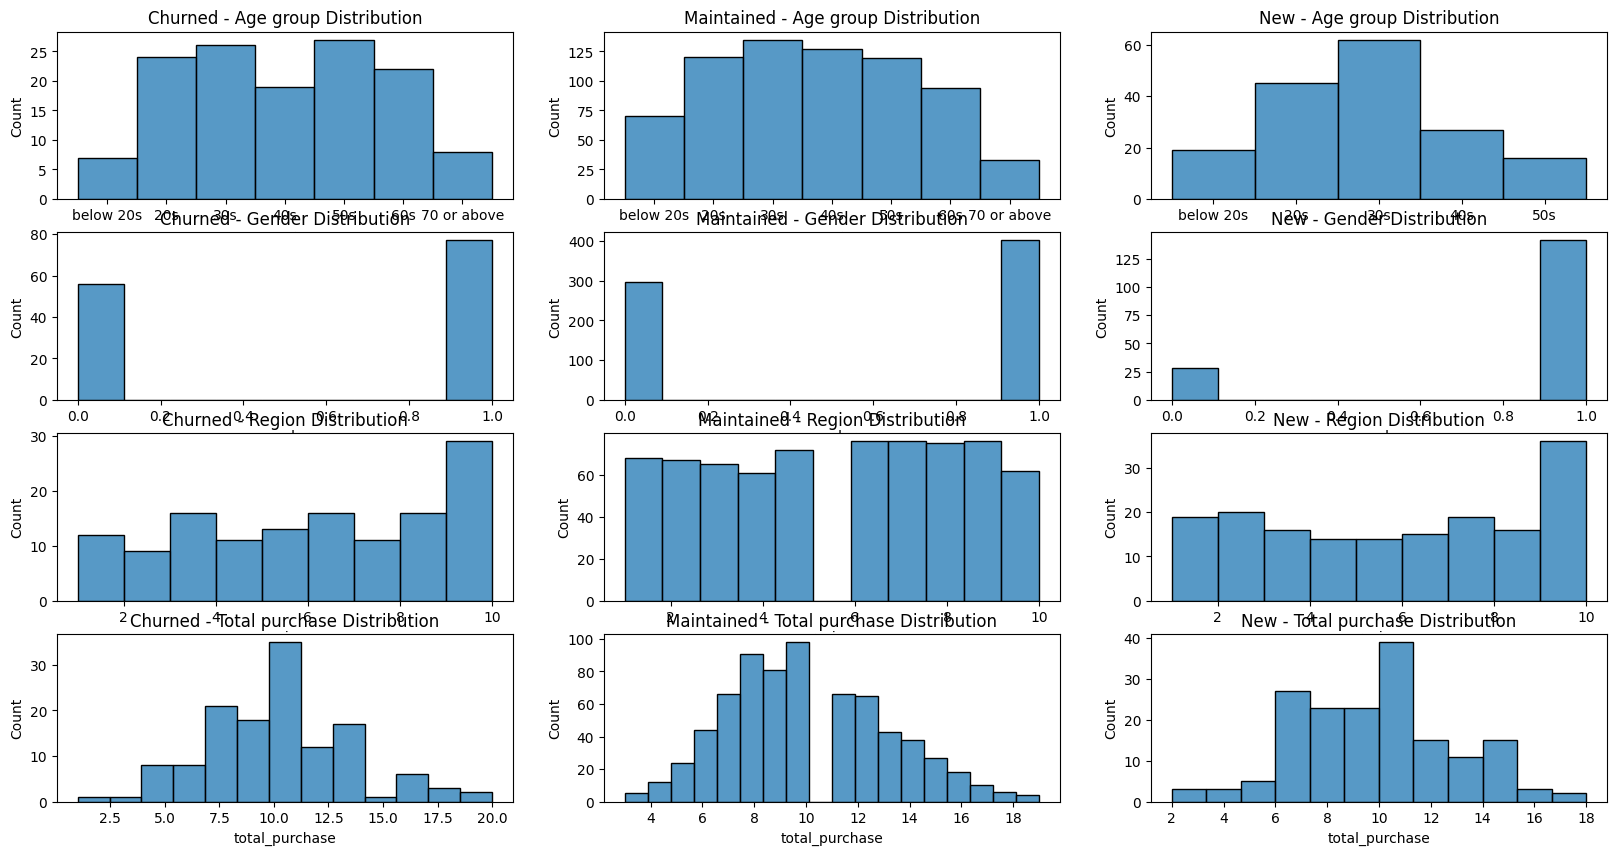

In [174]:
# 이탈 고객
age_order = pd.CategoricalDtype(categories=['below 20s', '20s', '30s', '40s', '50s', '60s', '70 or above'], ordered=True)
df_cus_t1['age_group'] = df_cus_t1['age_group'].astype(age_order)


fig, axes=plt.subplots(4,3, figsize=(20,10))

sns.histplot(df_cus_t1['age_group'], ax=axes[0,0])
axes[0,0].set_title('Churned - Age group Distribution')

sns.histplot(df_cus_t1['gender'], ax=axes[1,0])
axes[1,0].set_title('Churned - Gender Distribution')

sns.histplot(df_cus_t1['region'], ax=axes[2,0])
axes[2,0].set_title('Churned - Region Distribution')

sns.histplot(df_cus_t1['total_purchase'], ax=axes[3,0])
axes[3,0].set_title('Churned - Total purchase Distribution')


# 유지 고객
age_order = pd.CategoricalDtype(categories=['below 20s', '20s', '30s', '40s', '50s', '60s', '70 or above'], ordered=True)
df_cus_t2['age_group'] = df_cus_t2['age_group'].astype(age_order)


sns.histplot(df_cus_t2['age_group'], ax=axes[0,1])
axes[0,1].set_title('Maintained - Age group Distribution')

sns.histplot(df_cus_t2['gender'], ax=axes[1,1])
axes[1,1].set_title('Maintained - Gender Distribution')

sns.histplot(df_cus_t2['region'], ax=axes[2,1])
axes[2,1].set_title('Maintained - Region Distribution')

sns.histplot(df_cus_t2['total_purchase'], ax=axes[3,1])
axes[3,1].set_title('Maintained - Total purchase Distribution')


# 신규
df_cus_t3['age_group'] = df_cus_t3['age_group'].astype(age_order)


sns.histplot(df_cus_t3['age_group'], ax=axes[0,2])
axes[0,2].set_title('New - Age group Distribution')

sns.histplot(df_cus_t3['gender'], ax=axes[1,2])
axes[1,2].set_title('New - Gender Distribution')

sns.histplot(df_cus_t3['region'], ax=axes[2,2])
axes[2,2].set_title('New - Region Distribution')

sns.histplot(df_cus_t3['total_purchase'], ax=axes[3,2])
axes[3,2].set_title('New - Total purchase Distribution')


plt.show()

In [ ]:
# <<이탈/신규 비교 >>

# 이탈과 신규 유입은 지역 10에서 특히 많이 발생하는 것으로 보임

# ==> 따라서, 본 브랜드/제품에 대한 변동성이 가장 높은 주의 지역. 지역 별 거래 데이터 추가적으로 확인 필요 (선호 제품, 거래 볼륨 등)
# 신규 유입 고객 중 30대의 비율이 높으며 여성의 비율이 앞도적으로 높음

In [261]:
# 지역별 제품 선호도
region_piv=dff.pivot_table(index='region',columns='product', values='custid', aggfunc=pd.Series.nunique)
region_piv

product,10.0,20.0,30.0
region,,,
1,91,98,96
2,90,93,91
3,93,89,92
4,84,84,85
5,96,96,97
6,102,103,104
7,100,101,102
8,103,103,104
9,100,106,106


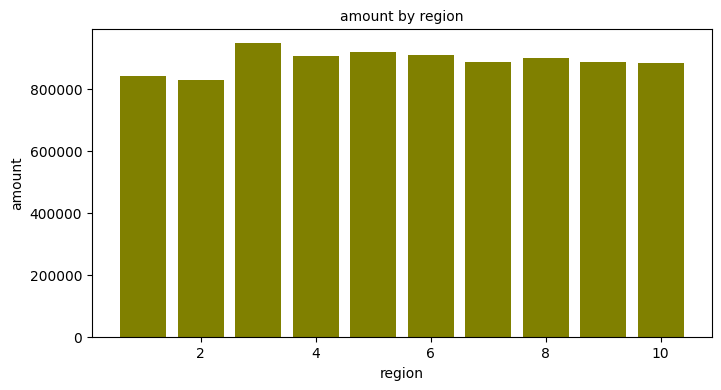

In [263]:
# 지역별 거래량
x=dff['region']
y=dff['amount']

plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8, color='olive')
plt.title('amount by region', size=10)
plt.ylabel('amount')
plt.xlabel('region')

plt.show()

In [267]:
df_cus.to_csv("/content/drive/MyDrive/KDT_240424/m3_분석라이브러리/평가/data_obj.csv", index=False)

### << 과제 3 Q2 요약  >>
* 2020년 대비 2021년 고객 수 소폭 증가 (+36명)
* 2020년 전체 고객 중 16% 정도가 이탈함 (133명 이탈)
* 2021년 전체 고객 중 19%가 신규 고객 (169명 추가)

* 이탈과 신규 유입은 지역 10에서 특히 많이 발생하는 것으로 보임
##### ==> 따라서, 본 브랜드/제품에 대한 변동성이 가장 높은 주의 지역. 추가적 데이터 확인 필요
* 신규 유입 고객 중 30대의 비율이 높으며 여성의 비율이 앞도적으로 높음

<< 지역 10 >>
* 제품 선호 및 거래량 기준으로는 타 지역 대비 눈에 띄는점 없음
* 추가 분석 필요하나 시간 관계상 더 확인하지 못함